In [1]:
import json
import math
import random
import time
from math import *

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_circles
from tabulate import tabulate

from kdtreen import *
from utils import *

In [2]:
no_points = 100
no_centres = 5

In [3]:
X, Y = make_blobs(n_samples=no_points, centers=no_centres)
points = list(set([(x, y) for x, y in X]))
# points = list(set([(round(x, 1), round(y, 1)) for x, y in X]))
print(len(points))

100


# kmeans 1st

In [4]:
k_clusters = math.ceil(math.sqrt(len(points)))

kmeans = KMeans(n_clusters=k_clusters)
kmeans.fit(points)
y_k = kmeans.predict(points)

clusters = [[] for _ in range(k_clusters)]

# Assign each point to its cluster
for point, cluster_index in zip(points, y_k):
    clusters[cluster_index].append(point)

# Now `clusters` is a list of lists, where each inner list contains the points in that cluster
print(clusters)



[[(4.86937918160105, -6.20338402148764), (4.172850127080286, -6.604406731467642), (4.133175658572021, -5.811334651013994), (5.718909487953492, -6.477995619305171), (5.189830774695017, -5.15946124162698), (5.343787734121769, -6.180481621824484), (4.80703813784662, -6.227336267472851), (4.305392567631711, -6.28294091603848), (5.014823001736815, -4.835314657657724)], [(3.913453625858608, 1.9816253235627888), (4.4966061456181015, 3.4233982874979243), (3.8159706076869093, 2.7811352690900244), (3.823045144768614, 2.289469268686143), (4.8976084170616465, 2.549935972878501), (3.3803499105986297, 3.526715009460407), (5.176835014922023, 3.585902035563457), (5.279117391411255, 3.080955997179851), (2.4122617410146923, 3.8292177745776366), (5.041499531298459, 3.3208465714135693), (3.03873583916217, 4.225987507993145)], [(-5.3792075400485455, -3.0074527965980744), (-6.166045584278759, -1.876349925931549), (-5.917114507238216, -2.7598211741845375), (-5.648492796360178, -2.855090465368204), (-3.200825

In [5]:
centroids_k = kmeans.cluster_centers_
centroids_k = [tuple(x) for x in centroids_k.tolist()]
print(centroids_k)
# Convert centroids to a list for easier handling/display

[(4.839465185693198, -5.975850636432774), (4.115953033581919, 3.1450171834457685), (-5.3857430312328685, -2.587711125561582), (2.489481494961213, -9.786258217674387), (5.8769005612772816, 4.840448224247048), (3.4955701560079397, -4.79652871476823), (-4.204192204757549, -0.9093703016980672), (-6.265439699922856, -0.6649625146666436), (6.034344620779539, 6.766966422112301), (2.7229587264363917, 1.5630231130154955)]


In [6]:
G = nx.Graph()

In [7]:
import math


def calculate_distance(point1, point2):
    return math.sqrt((point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2)


def create_distance_matrix(points):
    n = len(points)
    distance_matrix = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(i + 1, n):
            distance = calculate_distance(points[i], points[j])
            distance_matrix[i][j] = distance
            distance_matrix[j][i] = distance
    return distance_matrix


def primMST(graph):
    num_vertices = len(graph)
    key = [float("inf")] * num_vertices
    parent = [-1] * num_vertices
    mstSet = [False] * num_vertices
    key[0] = 0
    for cout in range(num_vertices):
        u = minKey(key, mstSet)
        mstSet[u] = True
        for v in range(num_vertices):
            if 0 < graph[u][v] < key[v] and not mstSet[v]:
                key[v] = graph[u][v]
                parent[v] = u
    return parent


def minKey(key, mstSet):
    min_val = float("inf")
    min_index = -1
    for v in range(len(key)):
        if key[v] < min_val and not mstSet[v]:
            min_val, min_index = key[v], v
    return min_index


def get_MST_edges_with_coordinates(points):
    distance_matrix = create_distance_matrix(points)
    mst_parent = primMST(distance_matrix)
    edges = []
    for i in range(1, len(points)):
        if mst_parent[i] != -1:  # Ensure there's a parent
            edge = (points[mst_parent[i]], points[i])
            edges.append(edge)
    return edges


Making mst of all the clusters.

In [8]:

clusters_mst_edges = []  # To store the MST edges of each cluster

for cluster in clusters:
    if len(cluster) > 1:  # Ensure there are at least two points to form an edge
        mst_edges = get_MST_edges_with_coordinates(cluster)
        clusters_mst_edges.append(mst_edges)
        G.add_edges_from(mst_edges)

for i, mst_edges in enumerate(clusters_mst_edges):
    print(f"{i + 1}th cluster MST edges: {len(mst_edges)}")
print(G)

1th cluster MST edges: 8
2th cluster MST edges: 10
3th cluster MST edges: 6
4th cluster MST edges: 19
5th cluster MST edges: 10
6th cluster MST edges: 10
7th cluster MST edges: 4
8th cluster MST edges: 7
9th cluster MST edges: 9
10th cluster MST edges: 7
Graph with 100 nodes and 90 edges


MST of all the centroids.

In [9]:
edges_v = get_MST_edges_with_coordinates(centroids_k)
print(f"Centroids MST edges: {len(edges_v)} , length: {len(centroids_k)} ,{edges_v} ")

Centroids MST edges: 9 , length: 10 ,[((2.7229587264363917, 1.5630231130154955), (4.115953033581919, 3.1450171834457685)), ((-4.204192204757549, -0.9093703016980672), (-5.3857430312328685, -2.587711125561582)), ((4.839465185693198, -5.975850636432774), (2.489481494961213, -9.786258217674387)), ((4.115953033581919, 3.1450171834457685), (5.8769005612772816, 4.840448224247048)), ((4.839465185693198, -5.975850636432774), (3.4955701560079397, -4.79652871476823)), ((2.7229587264363917, 1.5630231130154955), (-4.204192204757549, -0.9093703016980672)), ((-4.204192204757549, -0.9093703016980672), (-6.265439699922856, -0.6649625146666436)), ((5.8769005612772816, 4.840448224247048), (6.034344620779539, 6.766966422112301)), ((3.4955701560079397, -4.79652871476823), (2.7229587264363917, 1.5630231130154955))] 


In [10]:
edges_v

[((2.7229587264363917, 1.5630231130154955),
  (4.115953033581919, 3.1450171834457685)),
 ((-4.204192204757549, -0.9093703016980672),
  (-5.3857430312328685, -2.587711125561582)),
 ((4.839465185693198, -5.975850636432774),
  (2.489481494961213, -9.786258217674387)),
 ((4.115953033581919, 3.1450171834457685),
  (5.8769005612772816, 4.840448224247048)),
 ((4.839465185693198, -5.975850636432774),
  (3.4955701560079397, -4.79652871476823)),
 ((2.7229587264363917, 1.5630231130154955),
  (-4.204192204757549, -0.9093703016980672)),
 ((-4.204192204757549, -0.9093703016980672),
  (-6.265439699922856, -0.6649625146666436)),
 ((5.8769005612772816, 4.840448224247048),
  (6.034344620779539, 6.766966422112301)),
 ((3.4955701560079397, -4.79652871476823),
  (2.7229587264363917, 1.5630231130154955))]

In [11]:
mean_points = []
for edge in edges_v:
    point1, point2 = edge
    mean_point = ((point1[0] + point2[0]) / 2, (point1[1] + point2[1]) / 2)
    mean_points.append(mean_point)

print(mean_points)


[(3.4194558800091555, 2.354020148230632), (-4.7949676179952085, -1.7485407136298248), (3.6644733403272056, -7.881054427053581), (4.9964267974296, 3.992732703846408), (4.167517670850569, -5.386189675600502), (-0.7406167391605785, 0.3268264056587141), (-5.2348159523402025, -0.7871664081823554), (5.95562259102841, 5.803707323179674), (3.109264441222166, -1.6167528008763672)]


In [12]:

kmeans2 = KMeans(
    n_clusters=len(mean_points),
    init=mean_points,
    n_init=1,
    max_iter=1,
)

kmeans2.fit(mean_points)
clusters = [[] for _ in range(k_clusters)]

# Assign each point to its cluster
for point, cluster_index in zip(points, y_k):
    clusters[cluster_index].append(point)

# Now `clusters` is a list of lists, where each inner list contains the points in that cluster
print(clusters)

[[(4.86937918160105, -6.20338402148764), (4.172850127080286, -6.604406731467642), (4.133175658572021, -5.811334651013994), (5.718909487953492, -6.477995619305171), (5.189830774695017, -5.15946124162698), (5.343787734121769, -6.180481621824484), (4.80703813784662, -6.227336267472851), (4.305392567631711, -6.28294091603848), (5.014823001736815, -4.835314657657724)], [(3.913453625858608, 1.9816253235627888), (4.4966061456181015, 3.4233982874979243), (3.8159706076869093, 2.7811352690900244), (3.823045144768614, 2.289469268686143), (4.8976084170616465, 2.549935972878501), (3.3803499105986297, 3.526715009460407), (5.176835014922023, 3.585902035563457), (5.279117391411255, 3.080955997179851), (2.4122617410146923, 3.8292177745776366), (5.041499531298459, 3.3208465714135693), (3.03873583916217, 4.225987507993145)], [(-5.3792075400485455, -3.0074527965980744), (-6.166045584278759, -1.876349925931549), (-5.917114507238216, -2.7598211741845375), (-5.648492796360178, -2.855090465368204), (-3.200825

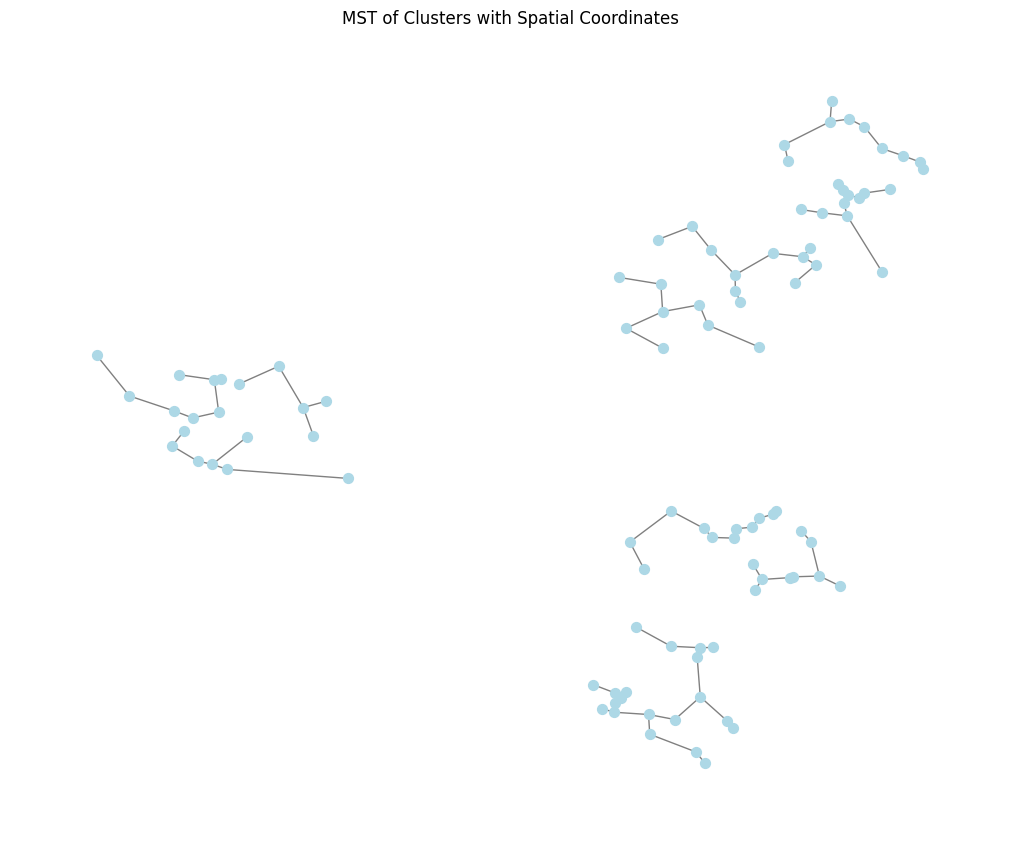

In [13]:
import networkx as nx

# Assuming clusters_mst_edges contains the MST edges for each cluster as calculated previously

# Create a new NetworkX graph
G = nx.Graph()

# Add edges from each cluster's MST to the graph
for mst_edges in clusters_mst_edges:
    G.add_edges_from(mst_edges)

pos = {node: node for node in G.nodes()}

# Plot the graph using the node positions
plt.figure(figsize=(10, 8))  # Set the figure size (optional)
nx.draw(
    G,
    pos,
    with_labels=False,
    node_color="lightblue",
    edge_color="gray",
    node_size=50,
    font_size=8,
)
plt.title("MST of Clusters with Spatial Coordinates")
plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure that `predefined_centers` and `np_points` are defined correctly
predefined_centers = np.array(edge_centers)
np_points = np.array(points)
# Rest of the code remains the same
kmeans2 = KMeans(
    n_clusters=len(predefined_centers),
    init=predefined_centers,
    n_init=1,
    max_iter=1,
)
kmeans2.fit(predefined_centers)
y_k2 = kmeans2.predict(np_points)

# Visualize the results after one iteration
plt.figure(figsize=(8, 6))
plt.scatter(np_points[:, 0], np_points[:, 1], c=y_k2, s=50, cmap="viridis")

# Plot the predefined centers and the centers after one iteration
plt.scatter(
    predefined_centers[:, 0],
    predefined_centers[:, 1],
    c="blue",
    s=200,
    alpha=0.5,
    marker="X",
    label="Predefined Centers",
)
plt.scatter(
    kmeans2.cluster_centers_[:, 0],
    kmeans2.cluster_centers_[:, 1],
    c="red",
    s=200,
    alpha=0.5,
    marker="X",
    label="Centers After One Iteration",
)
plt.title("K-Means Clustering with Predefined Centers (1 Iteration)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

NameError: name 'edge_centers' is not defined

In [ ]:
# Initialize a list for each cluster
clusters_2 = [[] for _ in range(k_clusters - 1)]

# Assign each point to its cluster
for point, cluster_index in zip(points, y_k2):
    clusters_2[cluster_index].append(point)

# Now `clusters` is a list of lists, where each inner list contains the points in that cluster
print(clusters_2)

[[(5.354878836297275, -8.477470469624867), (4.98172392059239, -7.236848911977998), (4.758588301601329, -7.456249880140782), (7.347424433697475, -7.236242267150388), (6.7480692445454435, -7.292330175757786), (5.164954417581045, -7.836397934658467), (5.625737585257989, -6.5080714748434705)], [(-9.025038788564238, 2.6544792999916775), (-8.46384492759638, 2.2211540687433384), (-7.823261159685169, 3.3724664971143437), (-8.251669049802409, 0.8952331563597276), (-9.104651432993146, 1.7113669339281654), (-7.398033496357955, 2.890165072479987), (-9.870249062271736, 2.5356170652219956), (-9.254939067666843, 2.00276270236689), (-7.5234696112548285, 4.225855447983743), (-9.394036260930346, 1.4101074560505071), (-7.0406248004334, 1.8940561223780437), (-9.145222198620482, 1.2513300836147327), (-9.665516698728, 1.285607341996092), (-8.410874112773582, 2.2063946617571437), (-7.866041394178835, 2.5531018250262574), (-6.188007520853317, 2.0375993658373983), (-6.727570238322885, 0.5443665483632878), (-10

In [ ]:
clusters_2_mst_edges = []  # To store the MST edges of each cluster

for cluster in clusters_2:
    if len(cluster) > 1:  # Ensure there are at least two points to form an edge
        mst_edges = get_MST_edges_with_coordinates(cluster)
        mst_edges_tuples = [tuple(edge) for edge in mst_edges]
        clusters_2_mst_edges.append(mst_edges_tuples)
    else:
        clusters_2_mst_edges.append([])  # No edges in a cluster with a single point

# Print MST edges for each cluster
for i, mst_edges in enumerate(clusters_2_mst_edges):
    print(f"Cluster {i} MST Edges:")
    for edge in mst_edges:
        print(edge)

Cluster 0 MST Edges:
((4.758588301601329, -7.456249880140782), (4.98172392059239, -7.236848911977998))
((5.164954417581045, -7.836397934658467), (4.758588301601329, -7.456249880140782))
((6.7480692445454435, -7.292330175757786), (7.347424433697475, -7.236242267150388))
((5.625737585257989, -6.5080714748434705), (6.7480692445454435, -7.292330175757786))
((5.354878836297275, -8.477470469624867), (5.164954417581045, -7.836397934658467))
((4.98172392059239, -7.236848911977998), (5.625737585257989, -6.5080714748434705))
Cluster 1 MST Edges:
((-9.025038788564238, 2.6544792999916775), (-8.46384492759638, 2.2211540687433384))
((-7.398033496357955, 2.890165072479987), (-7.823261159685169, 3.3724664971143437))
((-8.930216543550591, 0.3579022532742133), (-8.251669049802409, 0.8952331563597276))
((-9.254939067666843, 2.00276270236689), (-9.104651432993146, 1.7113669339281654))
((-7.866041394178835, 2.5531018250262574), (-7.398033496357955, 2.890165072479987))
((-9.254939067666843, 2.00276270236689

In [ ]:
clusters_2_mst_edges = []  # To store the MST edges of each cluster

for cluster in clusters_2:
    if len(cluster) > 1:  # Ensure there are at least two points to form an edge
        mst_edges = get_MST_edges_with_coordinates(cluster)
        mst_edges_tuples = [tuple(edge) for edge in mst_edges]
        clusters_2_mst_edges.append(mst_edges_tuples)
    else:
        clusters_2_mst_edges.append([])  # No edges in a cluster with a single point

# Print MST edges for each cluster
for i, mst_edges in enumerate(clusters_2_mst_edges):
    print(f"Cluster {i} MST Edges:")
    for edge in mst_edges:
        G.add_edge(edge[0], edge[1])
        print(edge)

Cluster 0 MST Edges:
((4.758588301601329, -7.456249880140782), (4.98172392059239, -7.236848911977998))
((5.164954417581045, -7.836397934658467), (4.758588301601329, -7.456249880140782))
((6.7480692445454435, -7.292330175757786), (7.347424433697475, -7.236242267150388))
((5.625737585257989, -6.5080714748434705), (6.7480692445454435, -7.292330175757786))
((5.354878836297275, -8.477470469624867), (5.164954417581045, -7.836397934658467))
((4.98172392059239, -7.236848911977998), (5.625737585257989, -6.5080714748434705))
Cluster 1 MST Edges:
((-9.025038788564238, 2.6544792999916775), (-8.46384492759638, 2.2211540687433384))
((-7.398033496357955, 2.890165072479987), (-7.823261159685169, 3.3724664971143437))
((-8.930216543550591, 0.3579022532742133), (-8.251669049802409, 0.8952331563597276))
((-9.254939067666843, 2.00276270236689), (-9.104651432993146, 1.7113669339281654))
((-7.866041394178835, 2.5531018250262574), (-7.398033496357955, 2.890165072479987))
((-9.254939067666843, 2.00276270236689

In [ ]:
type(clusters_2_mst_edges[0])

list

Text(0.5, 1.0, 'MST of Cluster 2')

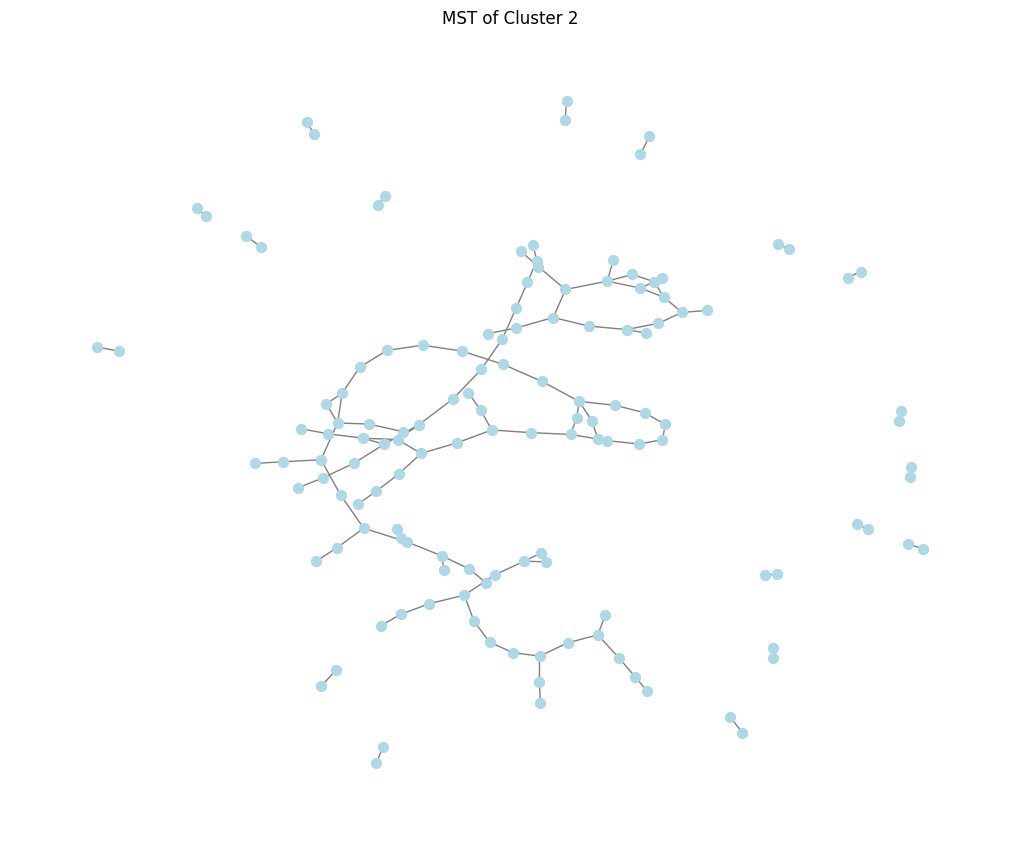

In [ ]:
# clusters_2_mst_edges = [tuple(edge) for edge in clusters_2_mst_edges] 
# for mst_edges in clusters_2_mst_edges:
#     G.add_edges_from(mst_edges)

# pos = {node: node for node in G.nodes()}

# Plot the graph using the node positions
plt.figure(figsize=(10, 8))  # Set the figure size (optional)
nx.draw(
    G,
    
    with_labels=False,
    node_color="lightblue",
    edge_color="gray",
    node_size=50,
    font_size=8,
)
plt.title("MST of Cluster 2")

In [ ]:
import numpy as np
from scipy.spatial import distance

core_points = []
components = list(nx.connected_components(G))

for component in components:
    points = np.array(list(component))
    centroid = points.mean(axis=0)
    distances = np.linalg.norm(points - centroid, axis=1)
    closest_point_index = np.argmin(distances)
    closest_point = points[closest_point_index]
    core_points.append(closest_point)
    print(f"The closest point to the centroid in the component is {closest_point}")

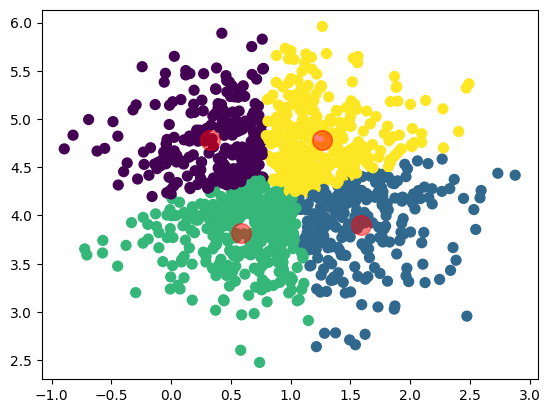

In [ ]:


# Generate sample data
X, y_true = make_blobs(n_samples=1130, centers=1, cluster_std=0.60, random_state=0)

# Apply KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap="viridis")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, alpha=0.5)
plt.show()

In [ ]:
type(centers)

numpy.ndarray

In [ ]:
import numpy as np


def generate_new_centers_np(points, n_centers):
    new_centers = np.zeros((0, points.shape[1]))  # Initialize with no centers
    while new_centers.shape[0] < n_centers:
        # Randomly select two indices
        indices = np.random.choice(points.shape[0], 2, replace=False)
        # Calculate the mean of the two points
        new_center = points[indices].mean(axis=0)
        # Check if the new center is unique
        if not np.any(np.all(np.isclose(new_centers, new_center), axis=1)):
            # If unique, add it to new_centers
            new_centers = np.vstack((new_centers, new_center))
    return new_centers


# Generate 3 new centers
new_centers_np = generate_new_centers_np(centers, 6)
new_centers_np

array([[0.79210661, 4.78146696],
       [0.9561975 , 4.34472548],
       [0.92290142, 4.29558251],
       [0.45512448, 4.29945849],
       [1.08699231, 3.85884103],
       [1.42397445, 4.3408495 ]])

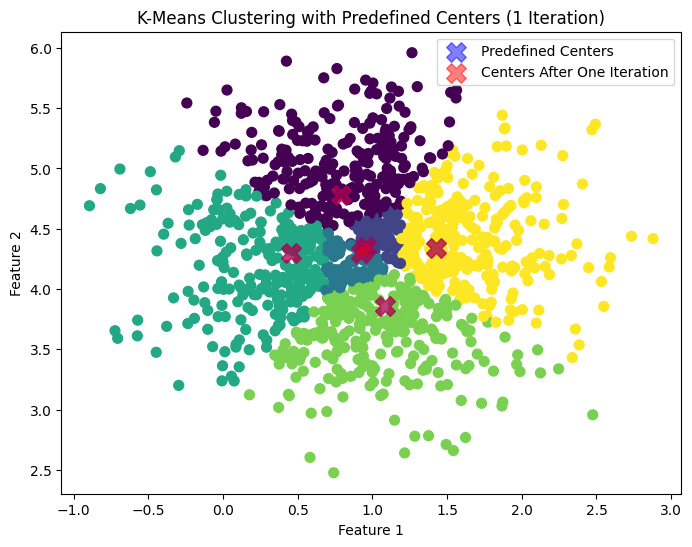

In [ ]:
# Adjusted KMeans with max_iter set to 1 for only one iteration
predefined_centers = new_centers_np
kmeans_predefined_one_iter = KMeans(
    n_clusters=predefined_centers.shape[0], init=predefined_centers, n_init=1, max_iter=1
)
kmeans_predefined_one_iter.fit(predefined_centers)
y_kmeans_predefined_one_iter = kmeans_predefined_one_iter.predict(X)

# Visualize the results after one iteration
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_predefined_one_iter, s=50, cmap="viridis")

# Plot the predefined centers and the centers after one iteration
plt.scatter(
    predefined_centers[:, 0],
    predefined_centers[:, 1],
    c="blue",
    s=200,
    alpha=0.5,
    marker="X",
    label="Predefined Centers",
)
plt.scatter(
    kmeans_predefined_one_iter.cluster_centers_[:, 0],
    kmeans_predefined_one_iter.cluster_centers_[:, 1],
    c="red",
    s=200,
    alpha=0.5,
    marker="X",
    label="Centers After One Iteration",
)
plt.title("K-Means Clustering with Predefined Centers (1 Iteration)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [ ]:
print(kmeans_predefined_one_iter.cluster_centers_)
print(predefined_centers)

[[0.79210661 4.78146696]
 [0.9561975  4.34472548]
 [0.92290142 4.29558251]
 [0.45512448 4.29945849]
 [1.08699231 3.85884103]
 [1.42397445 4.3408495 ]]
[[0.79210661 4.78146696]
 [0.9561975  4.34472548]
 [0.92290142 4.29558251]
 [0.45512448 4.29945849]
 [1.08699231 3.85884103]
 [1.42397445 4.3408495 ]]


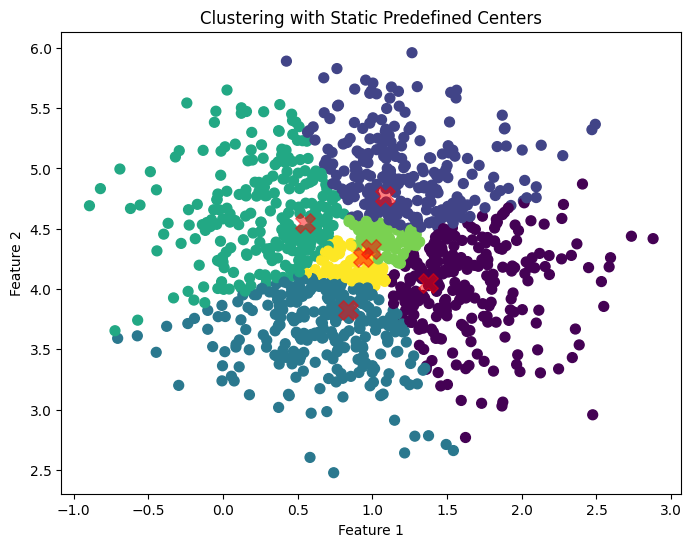

In [ ]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

predefined_centers = new_centers_np
# Calculate distances from each point to each predefined center
distances = cdist(X, predefined_centers)

# Assign each point to the nearest center
closest_center_indices = np.argmin(distances, axis=1)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=closest_center_indices, s=50, cmap="viridis")

# Plot the predefined centers
plt.scatter(
    predefined_centers[:, 0],
    predefined_centers[:, 1],
    c="red",
    s=200,
    alpha=0.5,
    marker="X",
)
plt.title("Clustering with Static Predefined Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

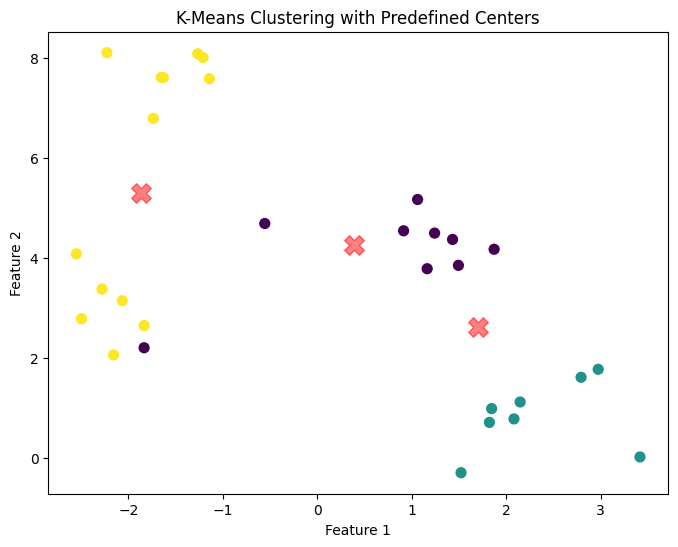

In [ ]:
import numpy as np

# Predefined centers
predefined_centers =  new_centers_np

# Generate a dataset with these centers in mind


# Apply k-means clustering with predefined centers as initial centroids
kmeans_predefined = KMeans(n_clusters=3, init=predefined_centers, n_init=1)
kmeans_predefined.fit(X)
y_kmeans_predefined = kmeans_predefined.predict(X)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_predefined, s=50, cmap="viridis")

# Plot the predefined centers
plt.scatter(
    predefined_centers[:, 0],
    predefined_centers[:, 1],
    c="red",
    s=200,
    alpha=0.5,
    marker="X",
)
plt.title("K-Means Clustering with Predefined Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
kmeans_predefined.cluster_centers_

array([[ 0.75504054,  4.14925046],
       [ 2.32605545,  0.84378376],
       [-1.86429348,  5.53754246]])

In [ ]:
savefile = "mst_datatest.json"
to_plot = False
no_points = 10000
no_centres = 2

In [ ]:
if no_points > 999:
    to_plot = False

In [ ]:
X, Y = make_blobs(n_samples=no_points, centers=no_centres)
points = list(set([(x, y) for x, y in X]))
# points = list(set([(round(x, 1), round(y, 1)) for x, y in X]))
print(len(points))

10000


In [ ]:
dcran_start_time = time.time()
i_neighbors_dict = {}
tree = KDTree()
G = nx.Graph()

In [ ]:
def build(points):
    global cordmap, i_neighbors_dict, tree, G
    tree.root = tree.build(points)
    limit_dist = math.ceil(log(len(points)))

    G.add_nodes_from(points)
    for point in points:
        i_neighbors_dict[point] = i_neighbors(tree, point, limit_dist)
    print("max dis : " ,limit_dist )
    return tree, G

In [ ]:
def dcran(points):
    global cordmap, i_neighbors_dict, tree, G
    tree, G = build(points)

    for k in range(math.ceil(log(len(points)))):
        components = list(nx.connected_components(G))
        if len(components) == 1:
            break
        for component in components:
            for pointi in component:
                eudis, pointj = i_neighbors_dict[pointi][k]
                if pointj in component:
                    continue

                G.add_edge(pointi, pointj, weight=eudis)
    print(len(list(nx.connected_components(G))))

In [ ]:
dcran(points)

max dis :  10
1


In [ ]:
import numpy as np
from scipy.spatial import distance

core_points = []
components = list(nx.connected_components(G))

for component in components:
    points = np.array(list(component))
    centroid = points.mean(axis=0)
    distances = np.linalg.norm(points - centroid, axis=1)
    closest_point_index = np.argmin(distances)
    closest_point = points[closest_point_index]
    core_points.append(closest_point)
    print(f"The closest point to the centroid in the component is {closest_point}")


The closest point to the centroid in the component is [-5.48703021 -8.83187096]


In [ ]:
import numpy as np
from scipy.spatial import distance

core_points = []
components = list(nx.connected_components(G))

for component in components:
    points = np.array(list(component))
    centroid = points.mean(axis=0)
    distances = np.linalg.norm(points - centroid, axis=1)
    closest_point_index = np.argmin(distances)
    closest_point = points[closest_point_index]
    core_points.append(closest_point)
    print(f"The closest point to the centroid in the component is {closest_point}")

The closest point to the centroid in the component is [-5.48703021 -8.83187096]


In [ ]:
core_points_x = sorted(enumerate(core_points), key=lambda x: x[1][0])
core_points_y = sorted(enumerate(core_points), key=lambda x: x[1][1])
tot_dis_x = 0
tot_dis_y = 0
for i in range(len(core_points_x)-1):
    tot_dis_x += distance.euclidean(core_points_x[i][1], core_points_x[i+1][1])
    tot_dis_y += distance.euclidean(core_points_y[i][1], core_points_y[i+1][1])

if tot_dis_x > tot_dis_y:
    core_points = core_points_y
else:
    core_points = core_points_x

In [ ]:
mst = nx.minimum_spanning_tree(G, algorithm="prim", weight="weight")

In [ ]:
dcran_end_time = time.time()
dcran_elapsed_time = dcran_end_time - dcran_start_time
print(dcran_elapsed_time)

1.1596739292144775


In [ ]:
stmst_start_time = time.time()

Implement KNn from scratch

In [ ]:



def calculate_distance(point1, point2):
    return math.sqrt((point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2)


def create_distance_matrix(points):
    n = len(points)
    distance_matrix = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(i + 1, n):
            distance = calculate_distance(points[i], points[j])
            distance_matrix[i][j] = distance
            distance_matrix[j][i] = distance
    return distance_matrix


def primMST(graph):
    num_vertices = len(graph)
    key = [float("inf")] * num_vertices
    parent = [-1] * num_vertices
    mstSet = [False] * num_vertices
    key[0] = 0

    for cout in range(num_vertices):
        u = minKey(key, mstSet)
        mstSet[u] = True
        for v in range(num_vertices):
            if 0 < graph[u][v] < key[v] and mstSet[v] is False:
                key[v] = graph[u][v]
                parent[v] = u
    return parent


def minKey(key, mstSet):
    min = float("inf")
    min_index = -1
    for v in range(len(key)):
        if key[v] < min and not mstSet[v]:
            min, min_index = key[v], v
    return min_index


# Example list of points

# Create the distance matrix
distance_matrix = create_distance_matrix(points)

# Generate MST using Prim's algorithm
mst = primMST(distance_matrix)

# Print the edges in the MST


KeyboardInterrupt: 

In [ ]:
stmst_end_time = time.time()
stmst_elapsed_time = stmst_end_time - stmst_start_time
print(stmst_elapsed_time)   

95.11501884460449


In [ ]:
stmst_elapsed_time/dcran_elapsed_time

47.198823239482195